### SEATTLE DATA

Let's start by importing the libraries and reading the data. We are going to analyze this data in order to see what is the expected price for a unit for rent in Seattle: Apartment, 2 bathrooms, 2 bedrooms and great location.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
#import prepare_data_functions as t
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import preprocessing

import seaborn as sns
%matplotlib inline

lf = pd.read_csv('./seattle/listings.csv')

lf.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [8]:
lf.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [9]:
lrows = lf.shape[0]
lcols = lf.shape[1]

print("There are {} rows in the listing dataset".format(lrows))
print("There are {} colums in the listing dataset".format(lcols))

There are 3818 rows in the listing dataset
There are 92 colums in the listing dataset


In [5]:
#get list for listings
lfull_fill_cols = set(lf.columns[lf.isnull().mean()==0])
print("Columns that are not missing values in listings dataset are: {}".format(lfull_fill_cols)+" and its lenght is {}".format(len(lfull_fill_cols)))
print(" ")

Columns that are not missing values in listings dataset are: {'market', 'calendar_updated', 'listing_url', 'maximum_nights', 'state', 'neighbourhood_group_cleansed', 'minimum_nights', 'accommodates', 'require_guest_profile_picture', 'host_verifications', 'name', 'amenities', 'availability_90', 'instant_bookable', 'number_of_reviews', 'room_type', 'host_id', 'city', 'last_scraped', 'longitude', 'availability_365', 'price', 'country', 'bed_type', 'street', 'calculated_host_listings_count', 'availability_30', 'country_code', 'picture_url', 'has_availability', 'availability_60', 'calendar_last_scraped', 'id', 'description', 'experiences_offered', 'smart_location', 'jurisdiction_names', 'neighbourhood_cleansed', 'extra_people', 'host_url', 'is_location_exact', 'require_guest_phone_verification', 'latitude', 'guests_included', 'scrape_id', 'cancellation_policy', 'requires_license'} and its lenght is 47
 


In [20]:
#create a dataframe of each string you want to search for in each row
def total_count(df, col1, col2, look_for):
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [17]:
# #function to clean data and plot

def clean_plot(df, title, col_name, look_for, plot):  
    clean = df[col_name].value_counts().reset_index()
    clean.rename(columns={'index': 'ammount', col_name: 'count'}, inplace=True)
    clean_lf = total_count(clean, 'ammount', 'count', look_for)
    clean_lf.set_index('ammount', inplace=True)
    if plot:
        (clean_lf/clean_lf.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_clean_lf = clean_lf/clean_lf.sum()
    return props_clean_lf

In [4]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [12]:
#sort values to find out min and max of price chart
no_null_p = lf.dropna(subset=['price'], how='any')
p_list = no_null_p['price'].to_numpy()

#remove "$" and "," symbols 
def rm_first(s):
    return s[1:-3]
newp_list = [rm_first(s) for s in p_list]
newp_list = [s.replace(',', '') for s in newp_list]

#convert to int
for i in range(0, len(newp_list)):
    newp_list[i] = int(newp_list[i])

print("Maximum of the list", max(newp_list))
print("Minimum of the list", min(newp_list))


Maximum of the list 1000
Minimum of the list 20


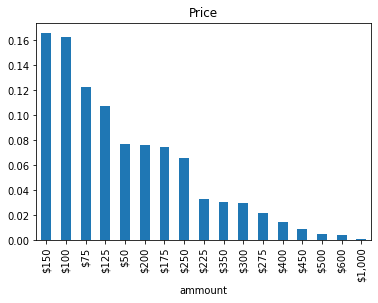

In [21]:
#chart for price
look_for_price = ['$50', '$75', '$100', '$125', '$150', '$175', '$200', '$225', '$250', '$275', '$300', '$350', '$400','$450', '$500', '$600', '$800', '$1,000', '$2000', '$3,000', '$4,000']

props_p = clean_plot(no_null_p, 'Price', 'price', look_for_price, True)

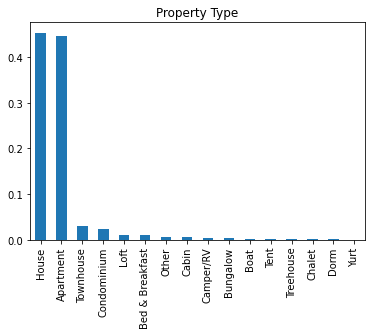

In [22]:
#chart for property_type
#We want to see what is the most common property type as well
pt_vals = lf.property_type.value_counts()
(pt_vals/lf.shape[0]).plot(kind="bar");
plt.title("Property Type");

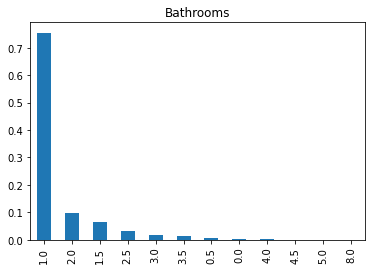

In [24]:
#chart for bathrooms
btr_vals = lf.bathrooms.value_counts()
(btr_vals/lf.shape[0]).plot(kind="bar");
plt.title("Bathrooms");

Another aspect we re interested is weekly price- this will help the client to compare the weekly prices in Boston with Seatle.

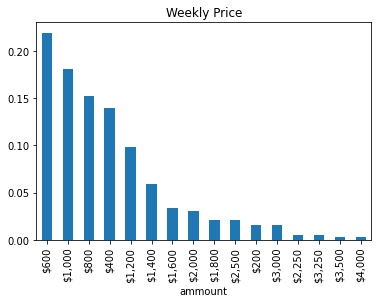

In [25]:
#chart for weekly price
no_null_week = lf.dropna(subset=['weekly_price'], how='any')

look_for_wprice = ['$200', '$400', '$600', '$800', '$1,000', '$1,200', '$1,400', '$1,600', '$1,800','$2,000', '$2,250', '$2,500', '$2,750', '$3,000', '$3,250', '$3,500', '$3,750', '$4,000', '$4,500', '$5,000']

props_week = clean_plot(no_null_week, 'Weekly Price', 'weekly_price', look_for_wprice, True)

<ipython-input-28-70714d7aefe0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_null_rc['review_scores_rating'] = no_null_rc['review_scores_rating'].apply(clean_currency).astype('str')


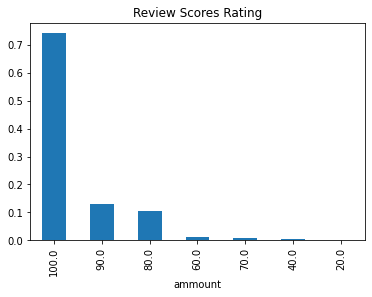

In [28]:
#chart for Review Scores Rating
no_null_rc = lf.dropna(subset=['review_scores_rating'], how='any')
#let's convert the values to string because the funtion is not going to iterate in float or int values.
no_null_rc['review_scores_rating'] = no_null_rc['review_scores_rating'].apply(clean_currency).astype('str')


look_for_rc = ['10.0', '20.0', '30.0', '40.0', '50.0', '60.0', '70.0', '80.0', '90.0', '100.0']
props_rc = clean_plot(no_null_rc, "Review Scores Rating", 'review_scores_rating', look_for_rc, True)

In [29]:
#In general, prices dictates score ratings, the higher the price the higher the rating
lf.groupby(['price']).mean()['review_scores_rating'].sort_values().dropna()

price
$178.00       60.0
$222.00       75.0
$359.00       80.0
$162.00       80.0
$102.00       80.0
             ...  
$163.00      100.0
$545.00      100.0
$680.00      100.0
$232.00      100.0
$1,000.00    100.0
Name: review_scores_rating, Length: 260, dtype: float64

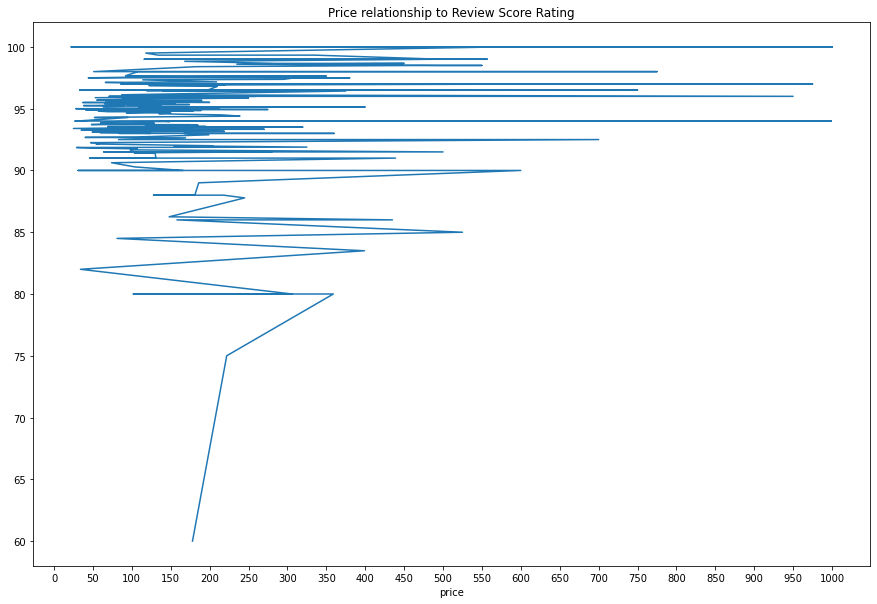

In [9]:
#In general, prices dictates score ratings, the higher the price the higher the rating
lf['price'] =lf['price'].apply(clean_currency).astype('float')
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(25))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(10))
plt.title("Price relationship to Review Score Rating");
lf.groupby(['price']).mean()['review_scores_rating'].sort_values().plot();

In [31]:
lp =lf

In [32]:
#what about weekly prices
lp['weekly_price'] =lp['weekly_price'].apply(clean_currency).astype('float')
lp.groupby(['weekly_price']).mean()['review_scores_rating'].sort_values().dropna()

weekly_price
4000.0     60.0
472.0      72.0
680.0      75.4
896.0      80.0
1096.0     80.0
          ...  
920.0     100.0
903.0     100.0
889.0     100.0
1150.0    100.0
6300.0    100.0
Name: review_scores_rating, Length: 381, dtype: float64

In [33]:
#Does a certain property type appear to have higher review_scores_rating
lf.groupby(['property_type']).mean()['review_scores_rating'].sort_values().dropna()

property_type
Chalet              83.500000
Dorm                90.000000
Apartment           93.977591
Tent                94.500000
House               94.833562
Condominium         95.318841
Loft                95.454545
Boat                95.600000
Camper/RV           95.700000
Bed & Breakfast     95.730769
Treehouse           96.000000
Cabin               96.238095
Other               96.263158
Townhouse           96.625000
Bungalow            97.666667
Yurt               100.000000
Name: review_scores_rating, dtype: float64

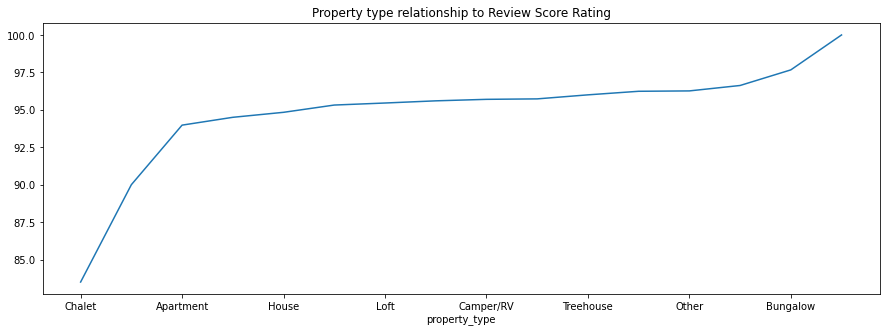

In [25]:
#Does a certain property type appear to have higher review_scores_rating
plt.figure(figsize=(15,5))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator('auto'))
plt.title("Property type relationship to Review Score Rating")
lf.groupby(['property_type']).mean()['review_scores_rating'].sort_values().plot();

In [7]:
#According to property_type, which unit has the highest average price?
lf['price'] =lf['price'].apply(clean_currency).astype('float')
lf.groupby(['property_type']).mean()['price'].sort_values().dropna()

property_type
Dorm                39.500000
Tent                54.000000
Other               94.681818
Chalet              98.500000
Yurt               100.000000
Treehouse          101.000000
Cabin              104.666667
Bed & Breakfast    112.054054
Bungalow           115.615385
Camper/RV          120.461538
Apartment          122.932670
Townhouse          129.457627
House              132.351414
Loft               135.700000
Condominium        151.109890
Boat               282.375000
Name: price, dtype: float64

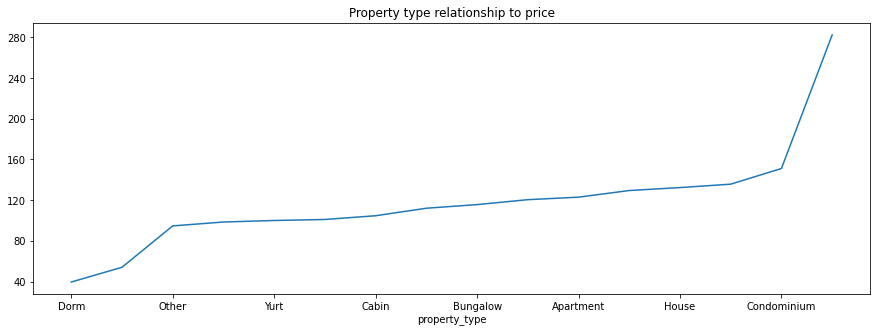

In [24]:
#According to the type of property, which unit has the highest average price?
plt.figure(figsize=(15,5))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator('auto'))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(8))
plt.title("Property type relationship to price")
lf.groupby(['property_type']).mean()['price'].sort_values().plot();

In [8]:
#According to the neighborhood, which unit has the highest average price?
lf['price'] =lf['price'].apply(clean_currency).astype('float')
lf.groupby(['neighbourhood']).mean()['price'].sort_values().dropna()

neighbourhood
Roxhill                 60.000000
Olympic Hills           63.666667
Dunlap                  75.461538
Rainier Beach           76.722222
Georgetown              77.000000
                          ...    
Alki                   196.652174
Westlake               197.000000
Portage Bay            241.428571
Industrial District    245.000000
Fairmount Park         370.000000
Name: price, Length: 81, dtype: float64

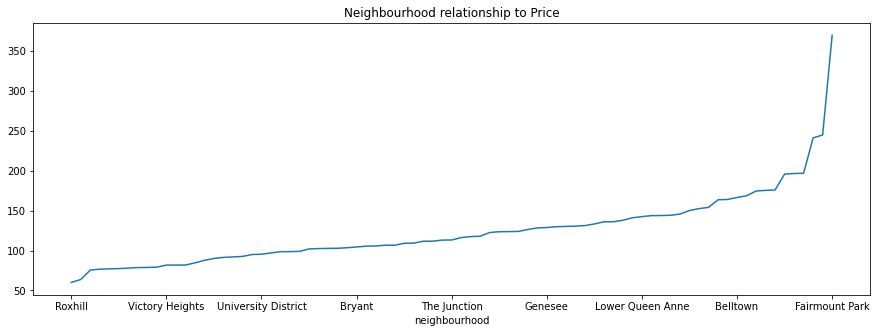

In [26]:
#According to the neighborhood, which unit has the highest average price?
plt.figure(figsize=(15,5));
plt.gca().xaxis.set_major_locator(plt.MaxNLocator('auto'))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(8))
plt.title("Neighbourhood relationship to Price")
lf.groupby(['neighbourhood']).mean()['price'].sort_values().plot();

In [36]:
#How many average bathrooms has a certain type of property?
lp.groupby(['property_type']).mean()['bathrooms'].sort_values().dropna()

property_type
Tent               0.500000
Camper/RV          0.846154
Cabin              1.000000
Chalet             1.000000
Treehouse          1.000000
Yurt               1.000000
Apartment          1.096357
Loft               1.125000
Bungalow           1.192308
Condominium        1.225275
House              1.399652
Other              1.409091
Townhouse          1.550847
Bed & Breakfast    1.648649
Boat               1.750000
Dorm               4.000000
Name: bathrooms, dtype: float64

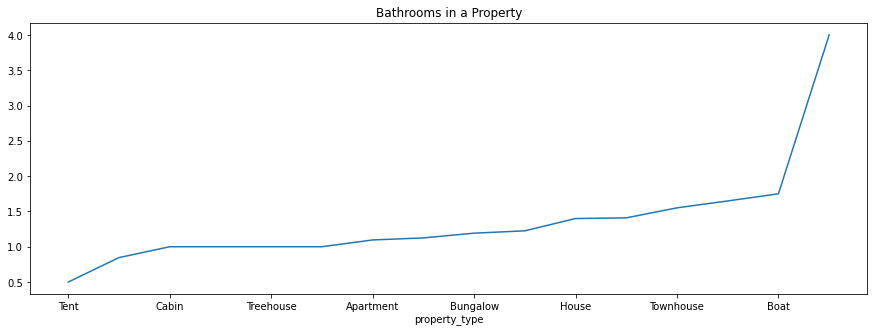

In [28]:
#How many average bathrooms has a certain type of property?
plt.figure(figsize=(15,5))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator('auto'))
plt.title("Bathrooms in a Property")
lf.groupby(['property_type']).mean()['bathrooms'].sort_values().plot();

In [37]:
#How many average bedrooms has a certain type of property?
lp.groupby(['property_type']).mean()['bedrooms'].sort_values().dropna()

property_type
Yurt               0.000000
Bungalow           0.615385
Treehouse          0.666667
Camper/RV          0.692308
Loft               0.750000
Other              0.809524
Cabin              0.857143
Bed & Breakfast    1.000000
Chalet             1.000000
Dorm               1.000000
Tent               1.000000
Apartment          1.033451
Condominium        1.241758
Townhouse          1.508475
House              1.609122
Boat               1.750000
Name: bedrooms, dtype: float64

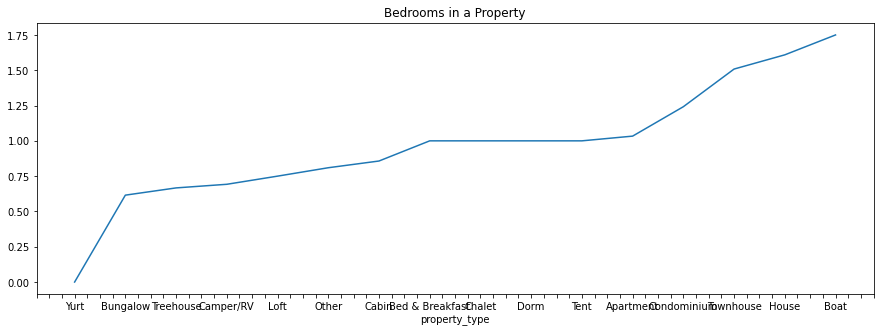

In [46]:
#How many average bedrooms has a certain type of property?
plt.figure(figsize=(15,5))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(66))
plt.title("Bedrooms in a Property")
lf.groupby(['property_type']).mean()['bedrooms'].sort_values().plot();